## Assignment 6
The following assignment will focus on analysing weather data and getting information on the Temperature and Windspeed.
>
**Author**: Loic Soares Bagnoud

### Cleaning the Data

The first thing that we need to do is to clean the data before we even attempt to get any sort of information from it.

In [1]:
# We import the packages we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# We check if the csv is working and store it in a variable
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# To avoid errors, we skip the first 22 rows, since they're not the raw data and are mostly informational.
# Next, we check to see if the data is loading well.
df = pd.read_csv(url, skiprows=22)
df.head(3)

C:\Users\lourd\AppData\Local\Temp\ipykernel_10960\3410072003.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [3]:
# We print the columns in the dataframe, so that we can focus on the ones that we want
print(df.columns.tolist())

['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']


In [4]:
# We get out chosen columns.
fields = ['date', 'temp', "wdsp"]
df = pd.read_csv(url, skiprows=22, usecols = fields)
df.head(3)

C:\Users\lourd\AppData\Local\Temp\ipykernel_10960\3827135916.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22, usecols = fields)


,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0


With our data sorted and selected, next comes the part of actually organising the date in a format that makes sense.

In [5]:
# Printing it out for reference.
df["date"]

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
256429    31-oct-2025 20:00
256430    31-oct-2025 21:00
256431    31-oct-2025 22:00
256432    31-oct-2025 23:00
256433    01-nov-2025 00:00
Name: date, Length: 256434, dtype: object

When trying parse the date into a specific format, I got prompted with a warning:

__*UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.*__
__*pd.to_datetime(df['date'])*__

I found it peculiar that it took over a minute to do this but chatgpt clarified that it's because there is possible inconsistency within that column as not all
dates have the same format. Some might be different formats, so python would need to parse through each individually and interpret as best as possible as the error describes. 

This led me to a specific function in the Pandas documentation to help with this and speed up load times called coerce, while also specifying the format I want.

In [6]:
# This is the original datetime that gave me the warning.
pd.to_datetime(df['date'])
df["date"]= pd.to_datetime(df['date'])
df.head(5)

C:\Users\lourd\AppData\Local\Temp\ipykernel_10960\3745829706.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date'])
C:\Users\lourd\AppData\Local\Temp\ipykernel_10960\3745829706.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


,date,temp,wdsp
0,1996-04-10 14:00:00,11.5,0
1,1996-07-31 08:00:00,11.5,0
2,1996-07-31 09:00:00,11.6,0
3,1996-07-31 10:00:00,12.9,0
4,1996-07-31 11:00:00,14.5,0


In [7]:
# This is the one with the coerce function activated.
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M', errors='coerce')
df.head(5)

,date,temp,wdsp
0,1996-04-10 14:00:00,11.5,0
1,1996-07-31 08:00:00,11.5,0
2,1996-07-31 09:00:00,11.6,0
3,1996-07-31 10:00:00,12.9,0
4,1996-07-31 11:00:00,14.5,0


References:
>
- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html - For clarification on the coerce function.
- https://chatgpt.com/share/69075102-8d88-800b-b2a2-196dd62e53bd - For understanding what **UserWarning** message was.

### Plotting the Temperature

We now go to the plots, and for this I was researching what type of plot would be best for this. A line plot seems to be the best for temperatures. As evidenced by my a first trial below:

<Axes: xlabel='date'>

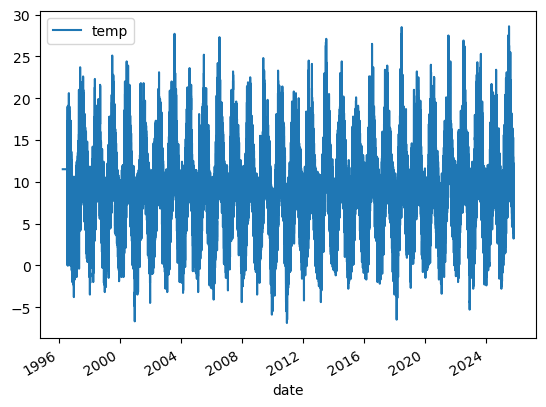

In [8]:
# A very basic plot as per an example in Stack overflow
xvalues='date'
yvalues = ['temp']
df.plot(x=xvalues, y=yvalues)

References:
>
- https://stackoverflow.com/questions/72780440/how-to-plot-local-date-and-time-vs-temperature-from-csv-file-that-uses-utc-for-d - Idea for the type of plot

Since that doesn't look nice, I decided to use Seaborn to make it a bit more presentable.

<Axes: title={'center': 'Temperature (Hourly)'}, xlabel='Date', ylabel='Temperature (°C)'>

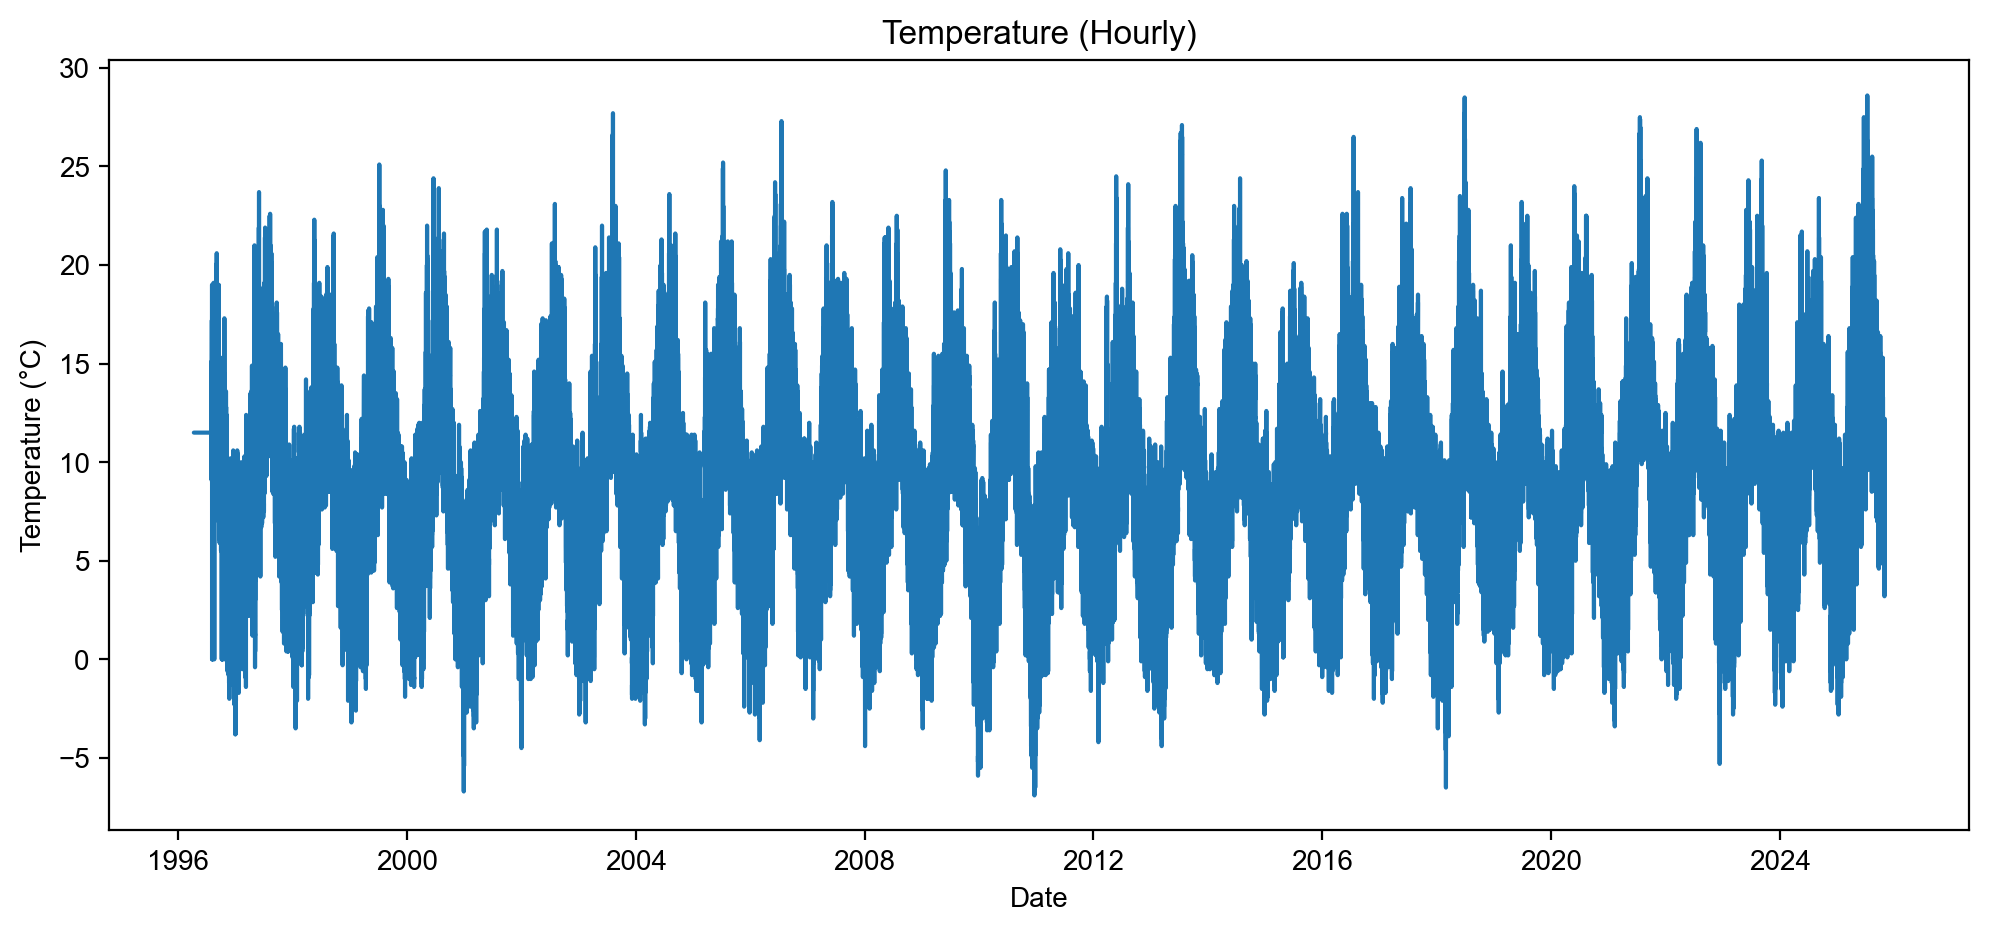

In [9]:
# We make it the size we want, followed by the title, x and y label as well as the type of plot. In this case a line plot via the .lineplot function.
plt.figure(figsize=(12, 5), dpi=200)
plt.title("Temperature (Hourly)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
sns.set_style("whitegrid")
sns.lineplot(x='date', y='temp', data=df)

References:
>
On making line plots with seaborn:
- https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial 
- https://seaborn.pydata.org/generated/seaborn.lineplot.html

When it comes to the daily mean temperature, I was able to find some nice examples of resampling code that groups the dates into buckets, to get the average.

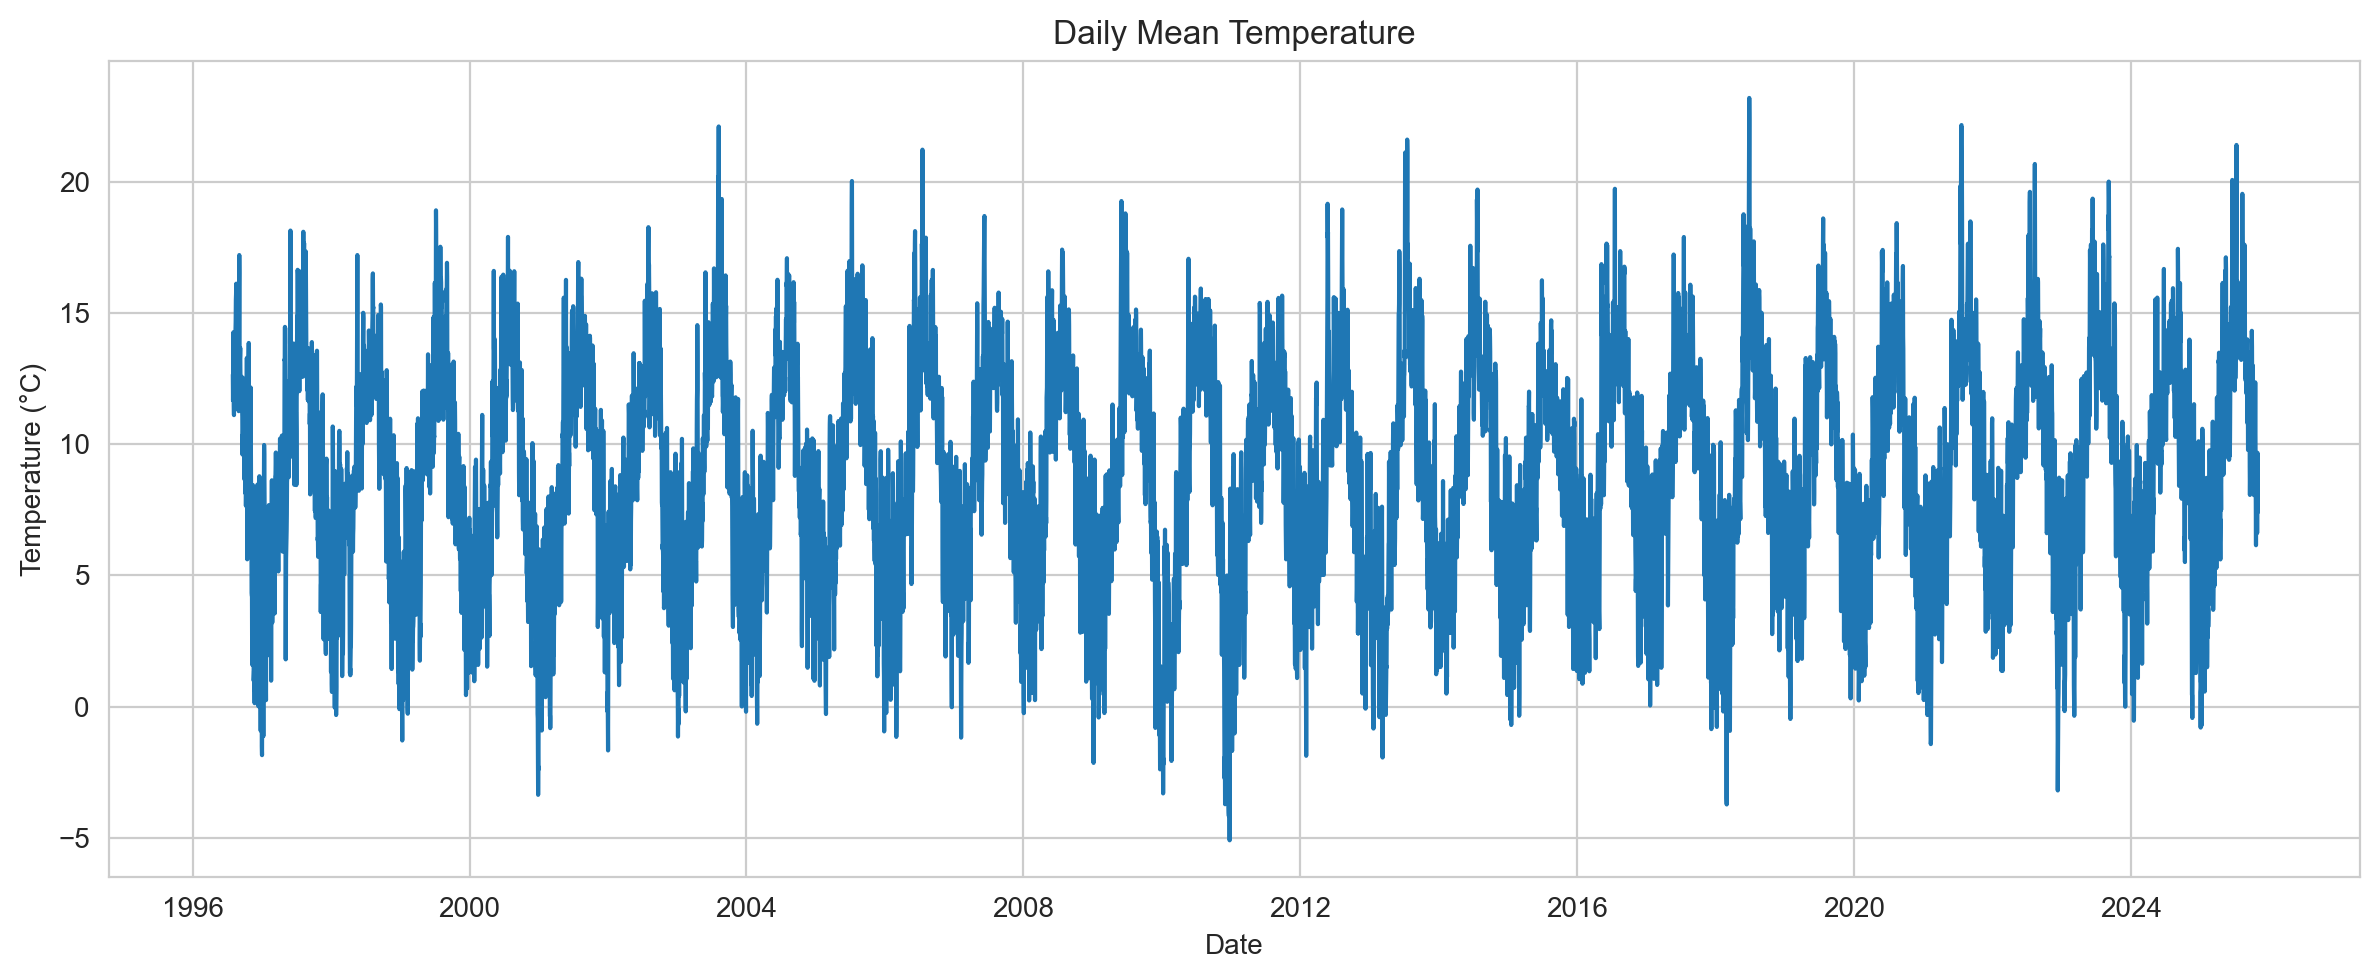

In [10]:

# We get a variable and use our resample function
daily = df.resample('D', on='date').agg({'temp': ['mean']})

# And we construct our plot.
plt.figure(figsize=(12, 5), dpi=200)
plt.plot(daily.index, daily[('temp', 'mean')])
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

References:
>
- https://medium.com/@whyamit101/understanding-pandas-resample-with-simple-examples-6c58cc252fbd - On resampling examples

For the monthly mean temperature, we follow the same logic as above, with the sole difference that we'll use "MS" for the month.

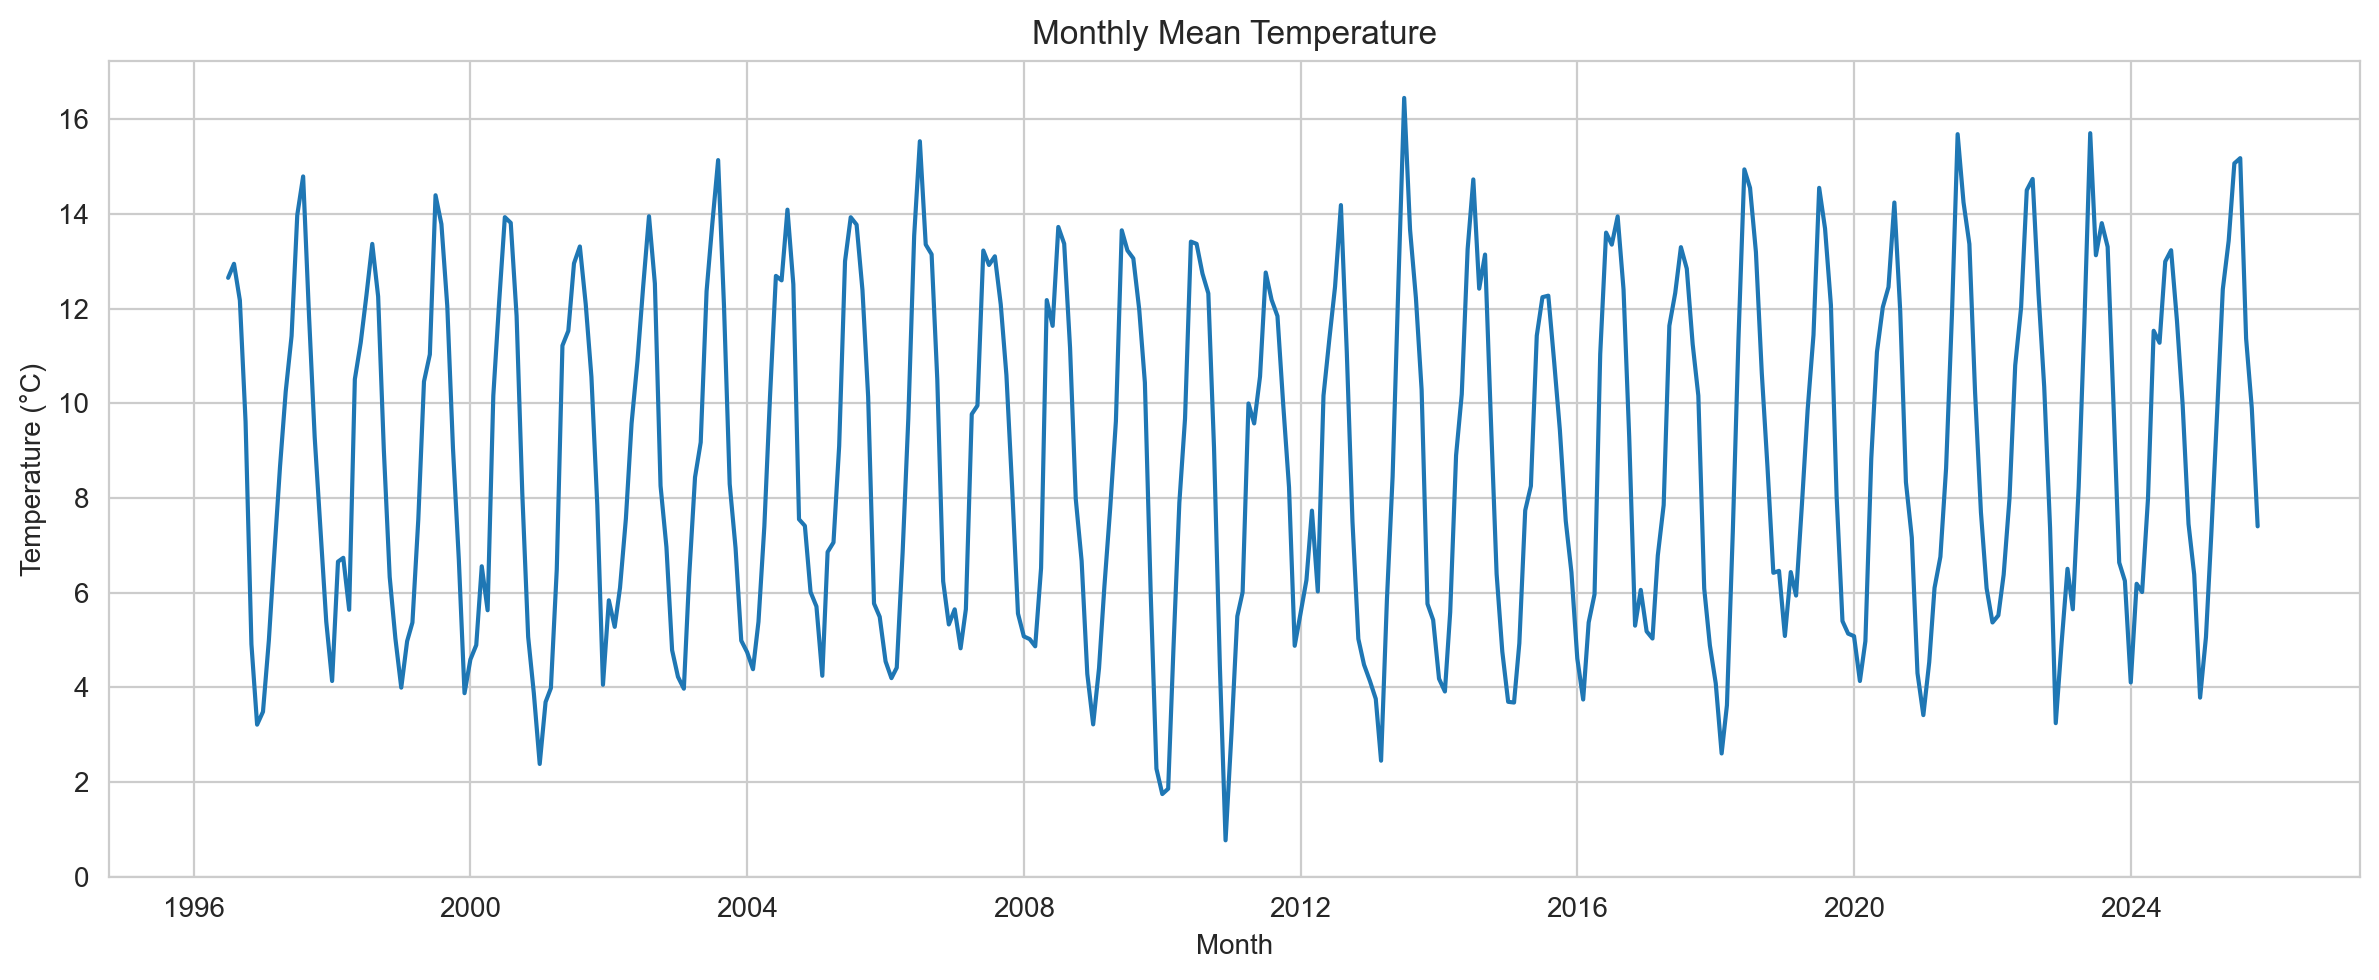

In [11]:
# Same logic as before.
monthly = df.resample('MS', on='date').agg({'temp': ['mean']})

# And we construct the plot again.
plt.figure(figsize=(12, 5), dpi=200)
plt.plot(monthly.index, monthly[('temp', 'mean')])
plt.title("Monthly Mean Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

### Plotting the Windspeed

For the Windspeed, we have a problem, which is the fact that values are missing from the wdsp column. I started by making the plots and I was getting constantly an error saying that there was no numeric data to plot on account from those missing values.

In [12]:
# We force the windspeed missing values to be numeric and interpreted as NaN. For this, I found the .to_numeric function
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

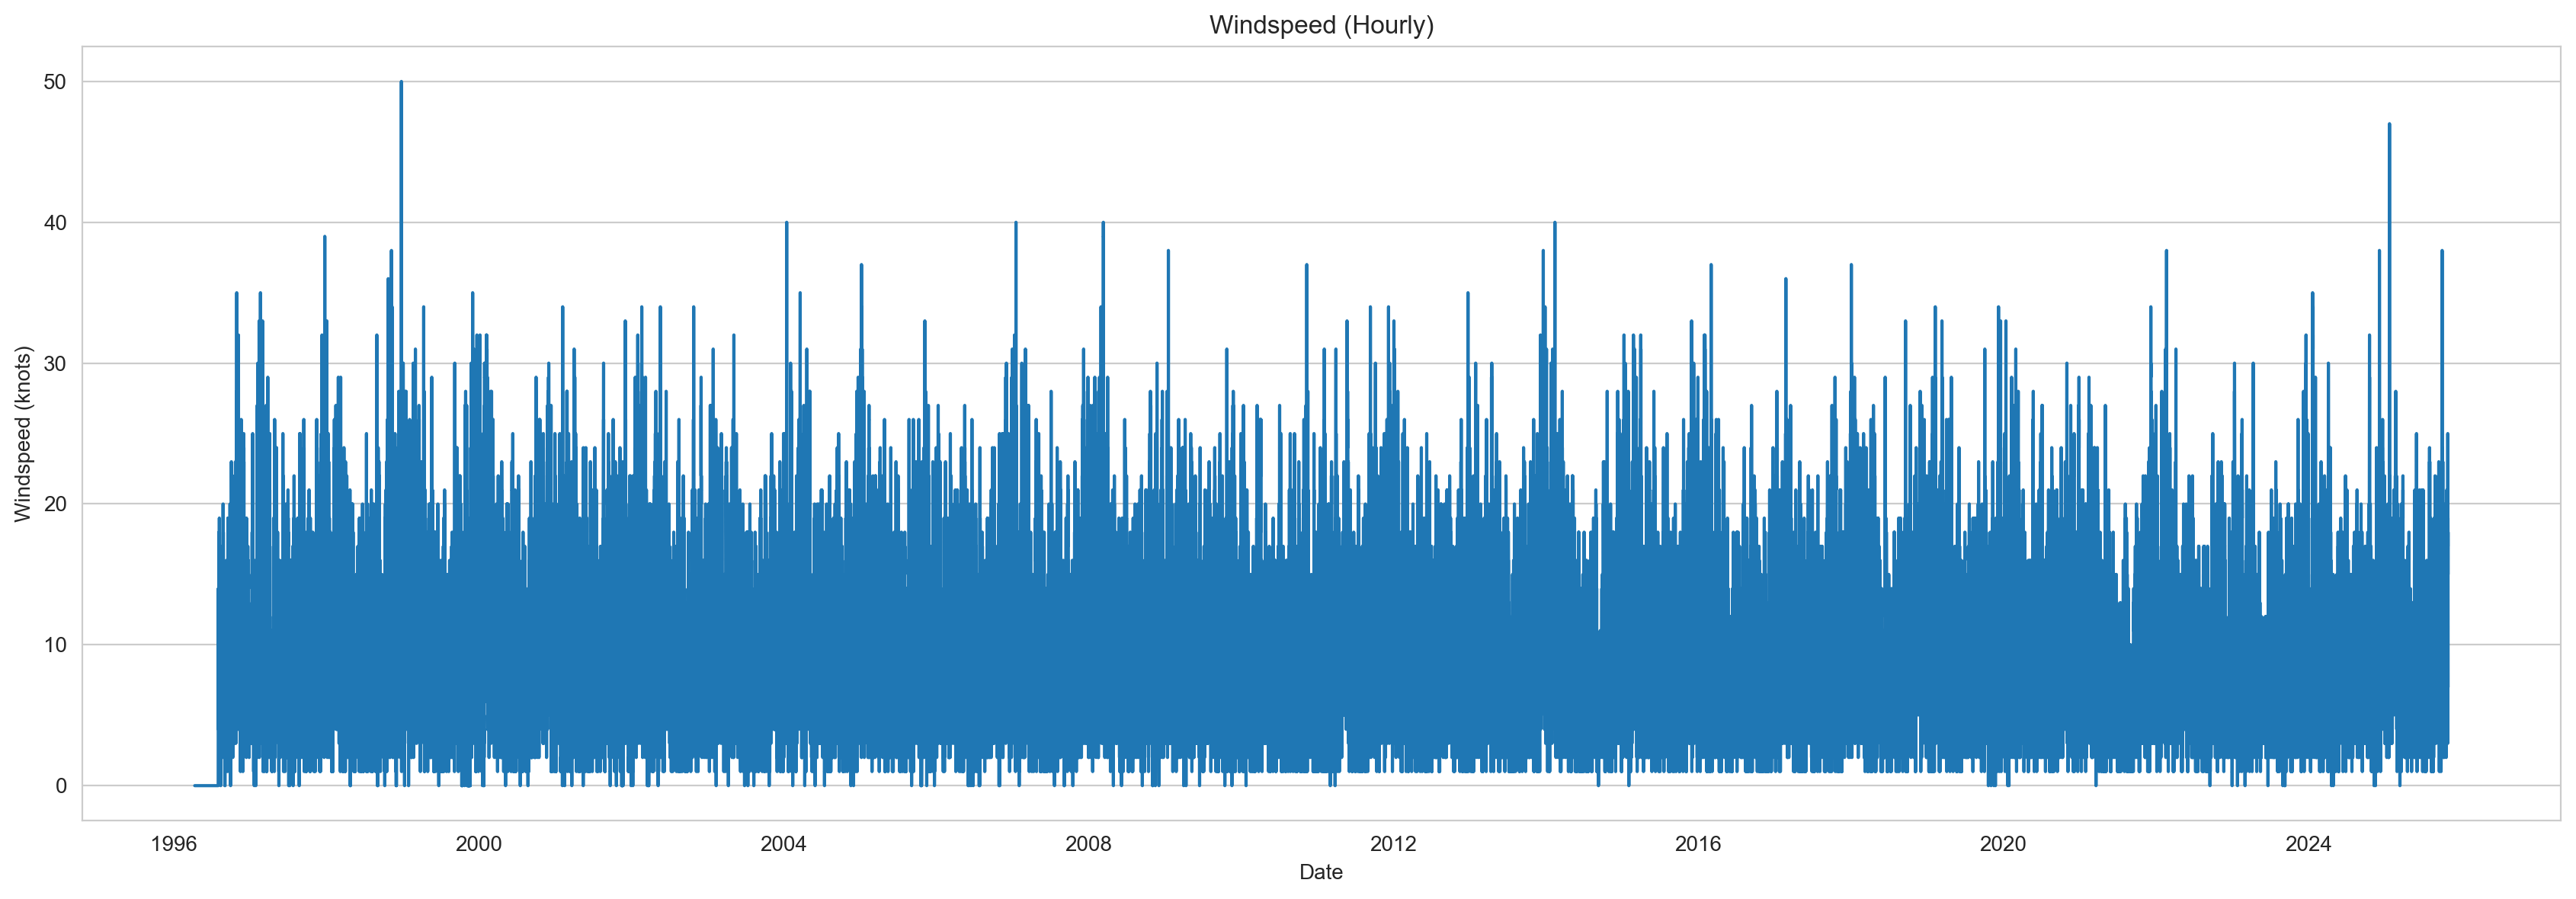

In [13]:
# We then make the plot.
plt.figure(figsize=(17, 6), dpi=200)
plt.title("Windspeed (Hourly)")
plt.xlabel("Date")
plt.ylabel("Windspeed (knots)")
sns.lineplot(x='date', y='wdsp', data=df)
plt.grid(axis='x') 
plt.tight_layout()
plt.show()

References: 
>
- https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html - On *.to_numeric*

For the rolling 24h windspeed, we're going to use the rolling function. The interesting part about the rolling function is that I was unsure if I needed to calculate with the mean, so I clarified with the ChatGPT on this. 
I tried originally with the mean and I thought it looked cluttered. However, this is to be expected given the amount of data and the fact is daily accross several years. Compared to the median, it's still the best way of viewing it.

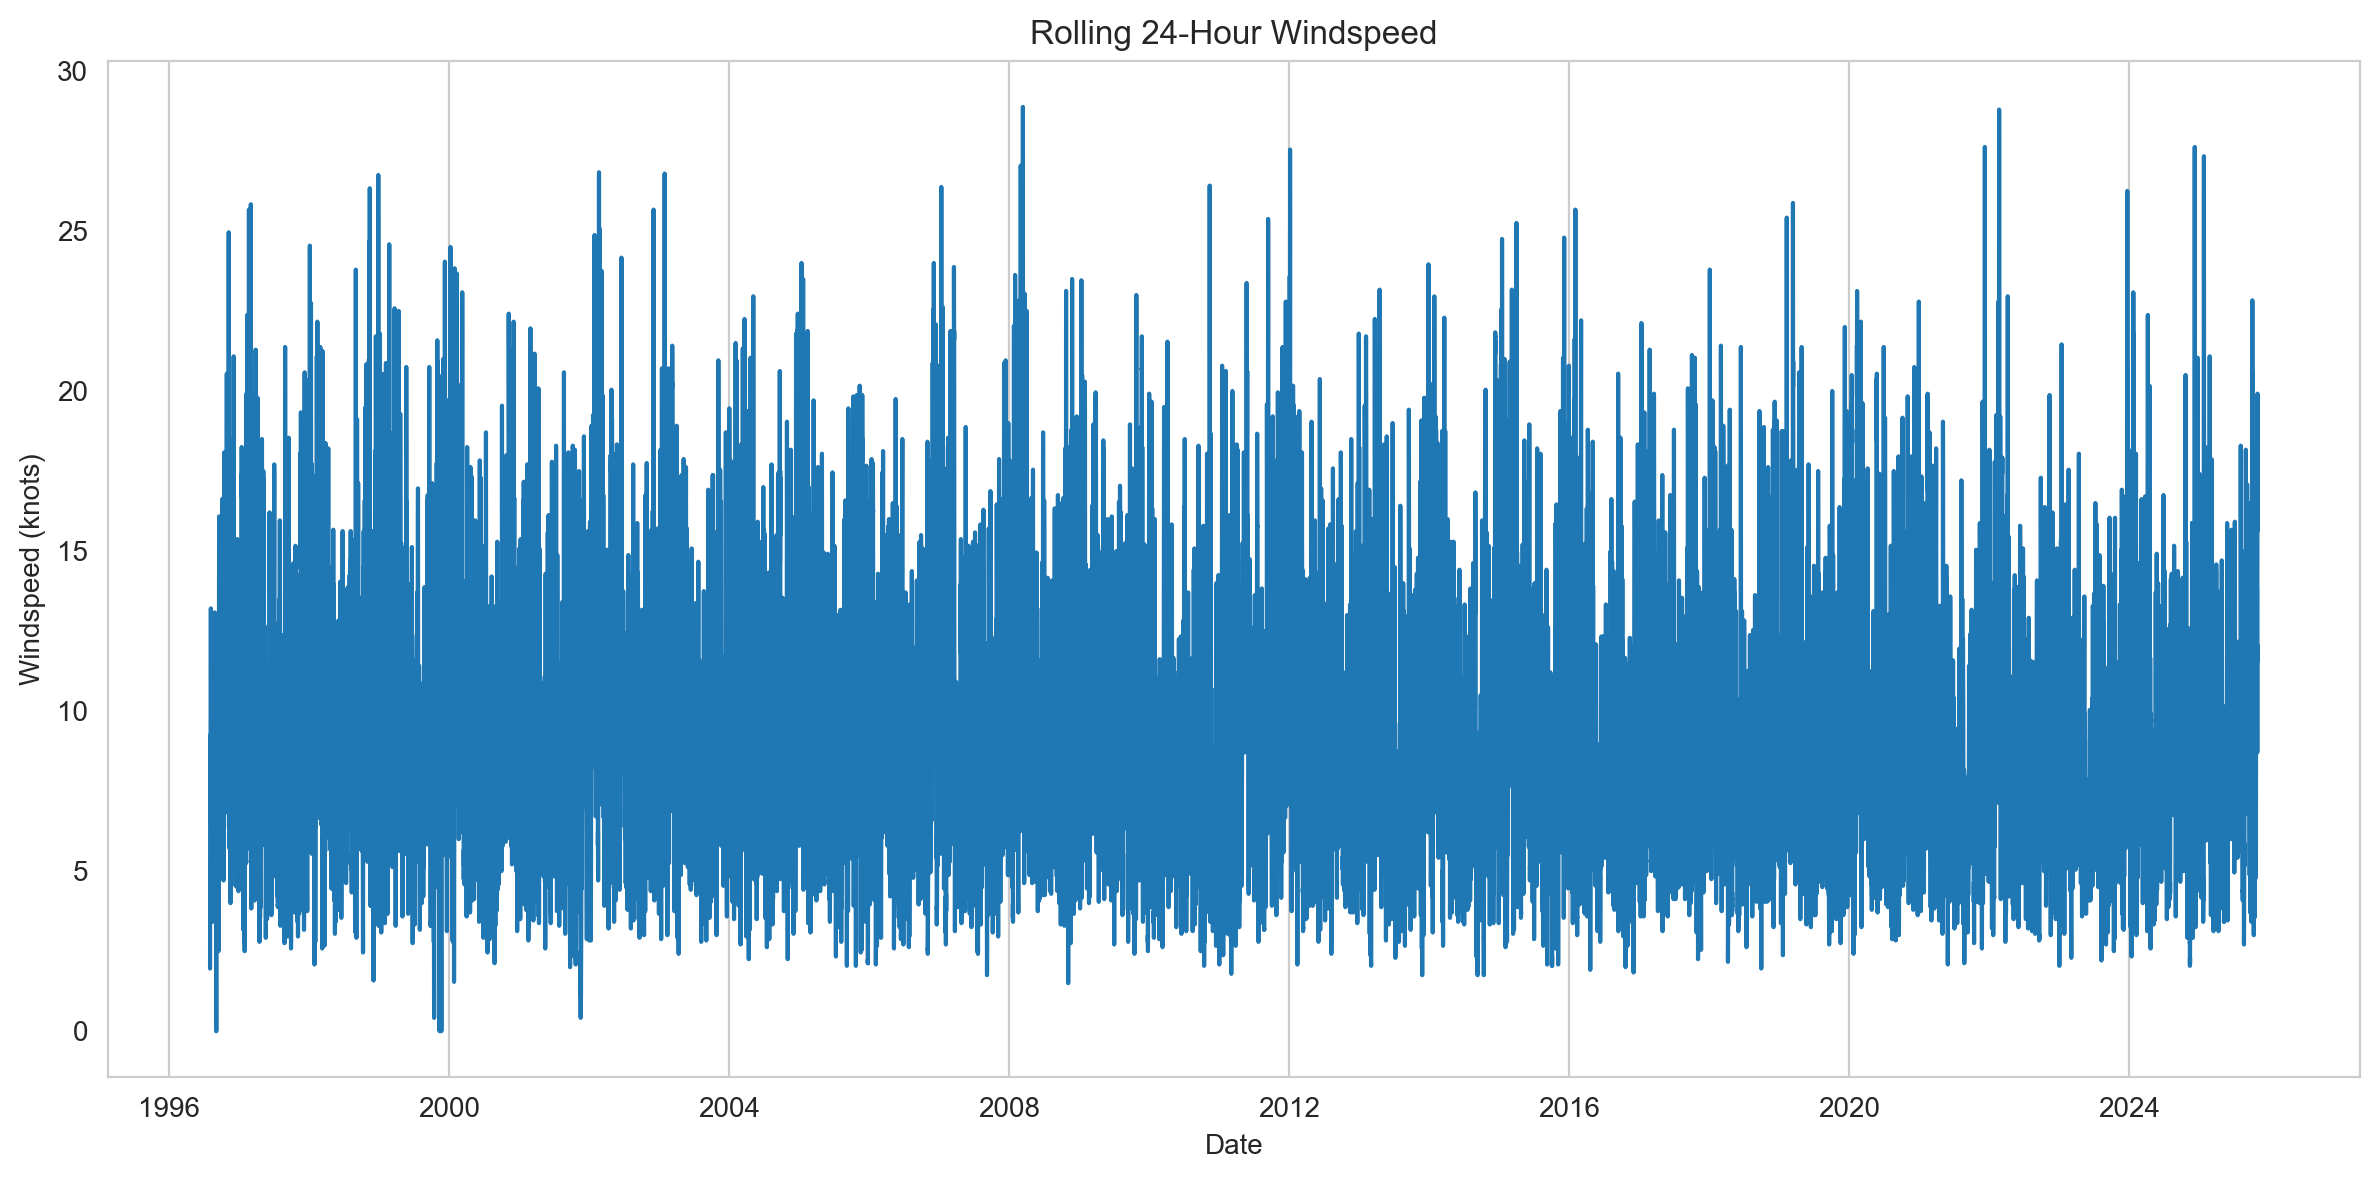

In [14]:
# We create a column in the dataframe called "rolling_wdsp" and we apply the .rolliong function to the windspeed column.
df['rolling_wdsp'] = df['wdsp'].rolling(window=24).mean()

# Now plot using seaborn
plt.figure(figsize=(12, 6), dpi=200)
plt.title("Rolling 24-Hour Windspeed")
plt.xlabel("Date")
plt.ylabel("Windspeed (knots)")
plt.grid(axis='y')
sns.lineplot(x='date', y='rolling_wdsp', data=df, zorder=2)
plt.tight_layout()
plt.show()

References:
>
On resampling and rolling:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html 
- https://realpython.com/pandas-dataframe/#resampling-and-rolling 
>
- https://chatgpt.com/share/690bb017-874c-800b-8945-ea78fc8f5609 - Discussion on calculating rolling wdsp with the mean.

For the maximum windspeed, we can once more apply the same logic we had with the Temperature. The only difference is that we specify "max"

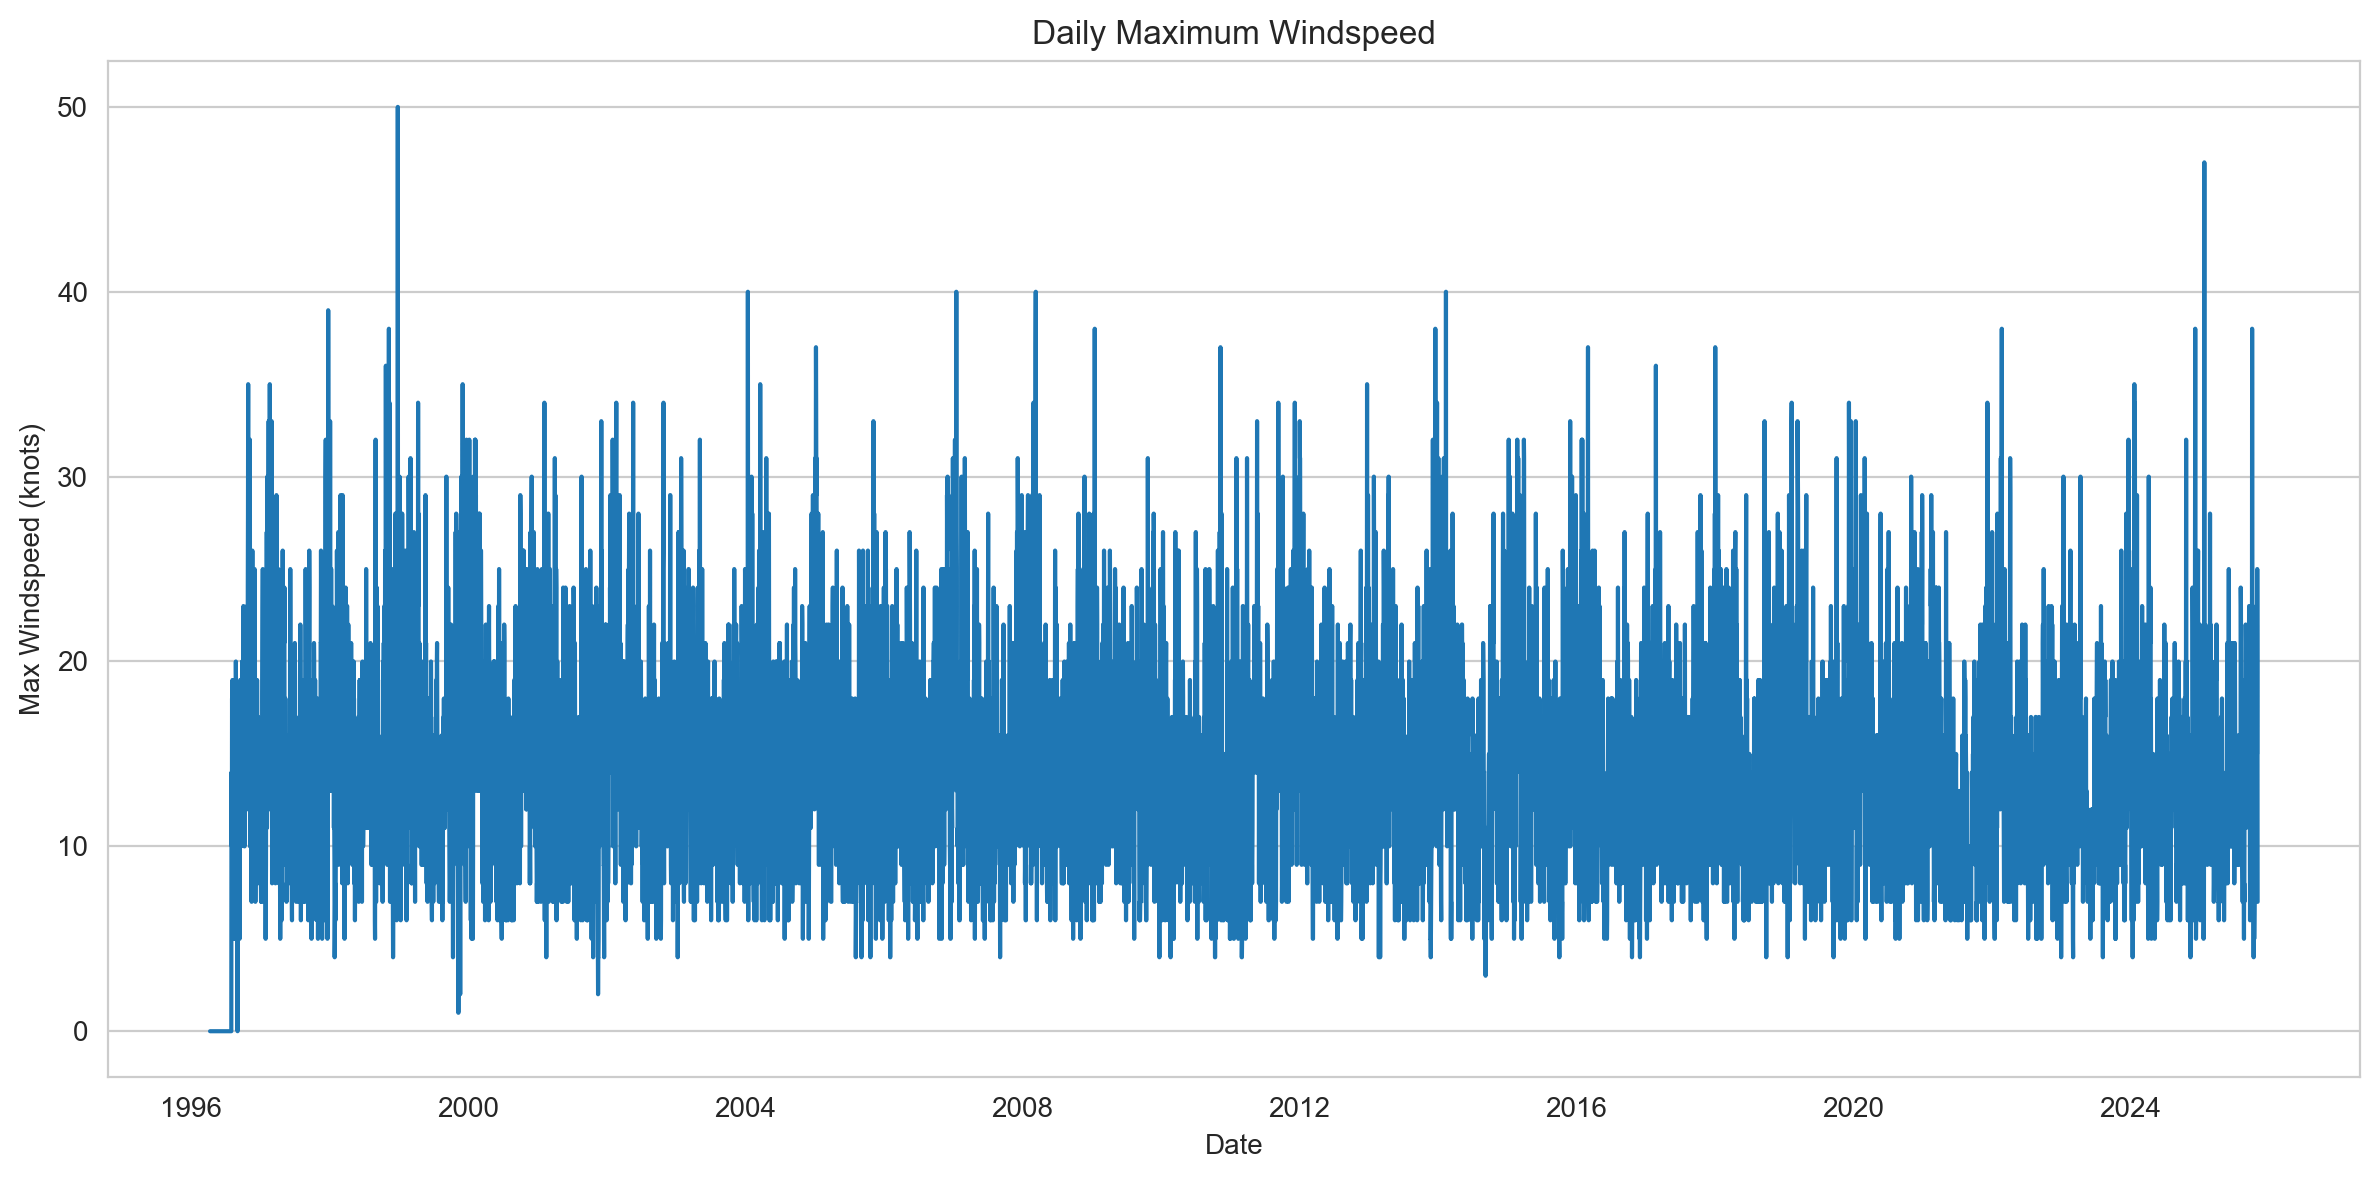

In [15]:
# We resample the max windspeed by day (D)
daily_max_wind = df.resample('D', on='date').agg({'wdsp': 'max'})

# We make our plot
sns.set_style("whitegrid", {'axes.grid': False})
plt.figure(figsize=(12, 6), dpi=200)
plt.title("Daily Maximum Windspeed")
plt.xlabel("Date")
plt.ylabel("Max Windspeed (knots)")
plt.grid(axis='y')
sns.lineplot(x='date', y='wdsp', data=daily_max_wind)
plt.tight_layout()
plt.show()

I noticed that the above graph has a very sharp drop at the beginning. But after confirming with ChatGPT and some research, it was exactly because of the missing values at the beginning as well as a fairly large amount of 0 windspeeds. But after researching this a bit from other data analysts, it seems that it's perfectly natural, as long as it's not constant. It's a bit weird to be finding it only at the beginning of the dataset, but I took it to be the instruments calibrating. I found it very bizarre anyway, so I decided to remove the 0s at the beginning.

In [16]:
# Double checking the first 20 lines of wdsp to see if we in fact have 0 values.
print(df[['date', 'wdsp']].head(20))

                  date  wdsp
0  1996-04-10 14:00:00   0.0
1  1996-07-31 08:00:00   0.0
2  1996-07-31 09:00:00   0.0
3  1996-07-31 10:00:00   0.0
4  1996-07-31 11:00:00   0.0
5  1996-07-31 12:00:00   0.0
6  1996-07-31 13:00:00   0.0
7  1996-07-31 14:00:00   0.0
8  1996-07-31 15:00:00   0.0
9  1996-07-31 16:00:00   0.0
10 1996-07-31 17:00:00   0.0
11 1996-07-31 18:00:00   0.0
12 1996-07-31 19:00:00   0.0
13 1996-07-31 20:00:00   0.0
14 1996-07-31 21:00:00   0.0
15 1996-07-31 22:00:00   0.0
16 1996-07-31 23:00:00   0.0
17 1996-08-01 00:00:00   0.0
18 1996-08-01 01:00:00   6.0
19 1996-08-01 02:00:00   8.0


In [17]:
# This gets rid of all the 0 values at the beginning of the dataset. This code was provided by ChatGPT.
df = df.loc[df['date'] >= df[df['wdsp'] > 0]['date'].min()]

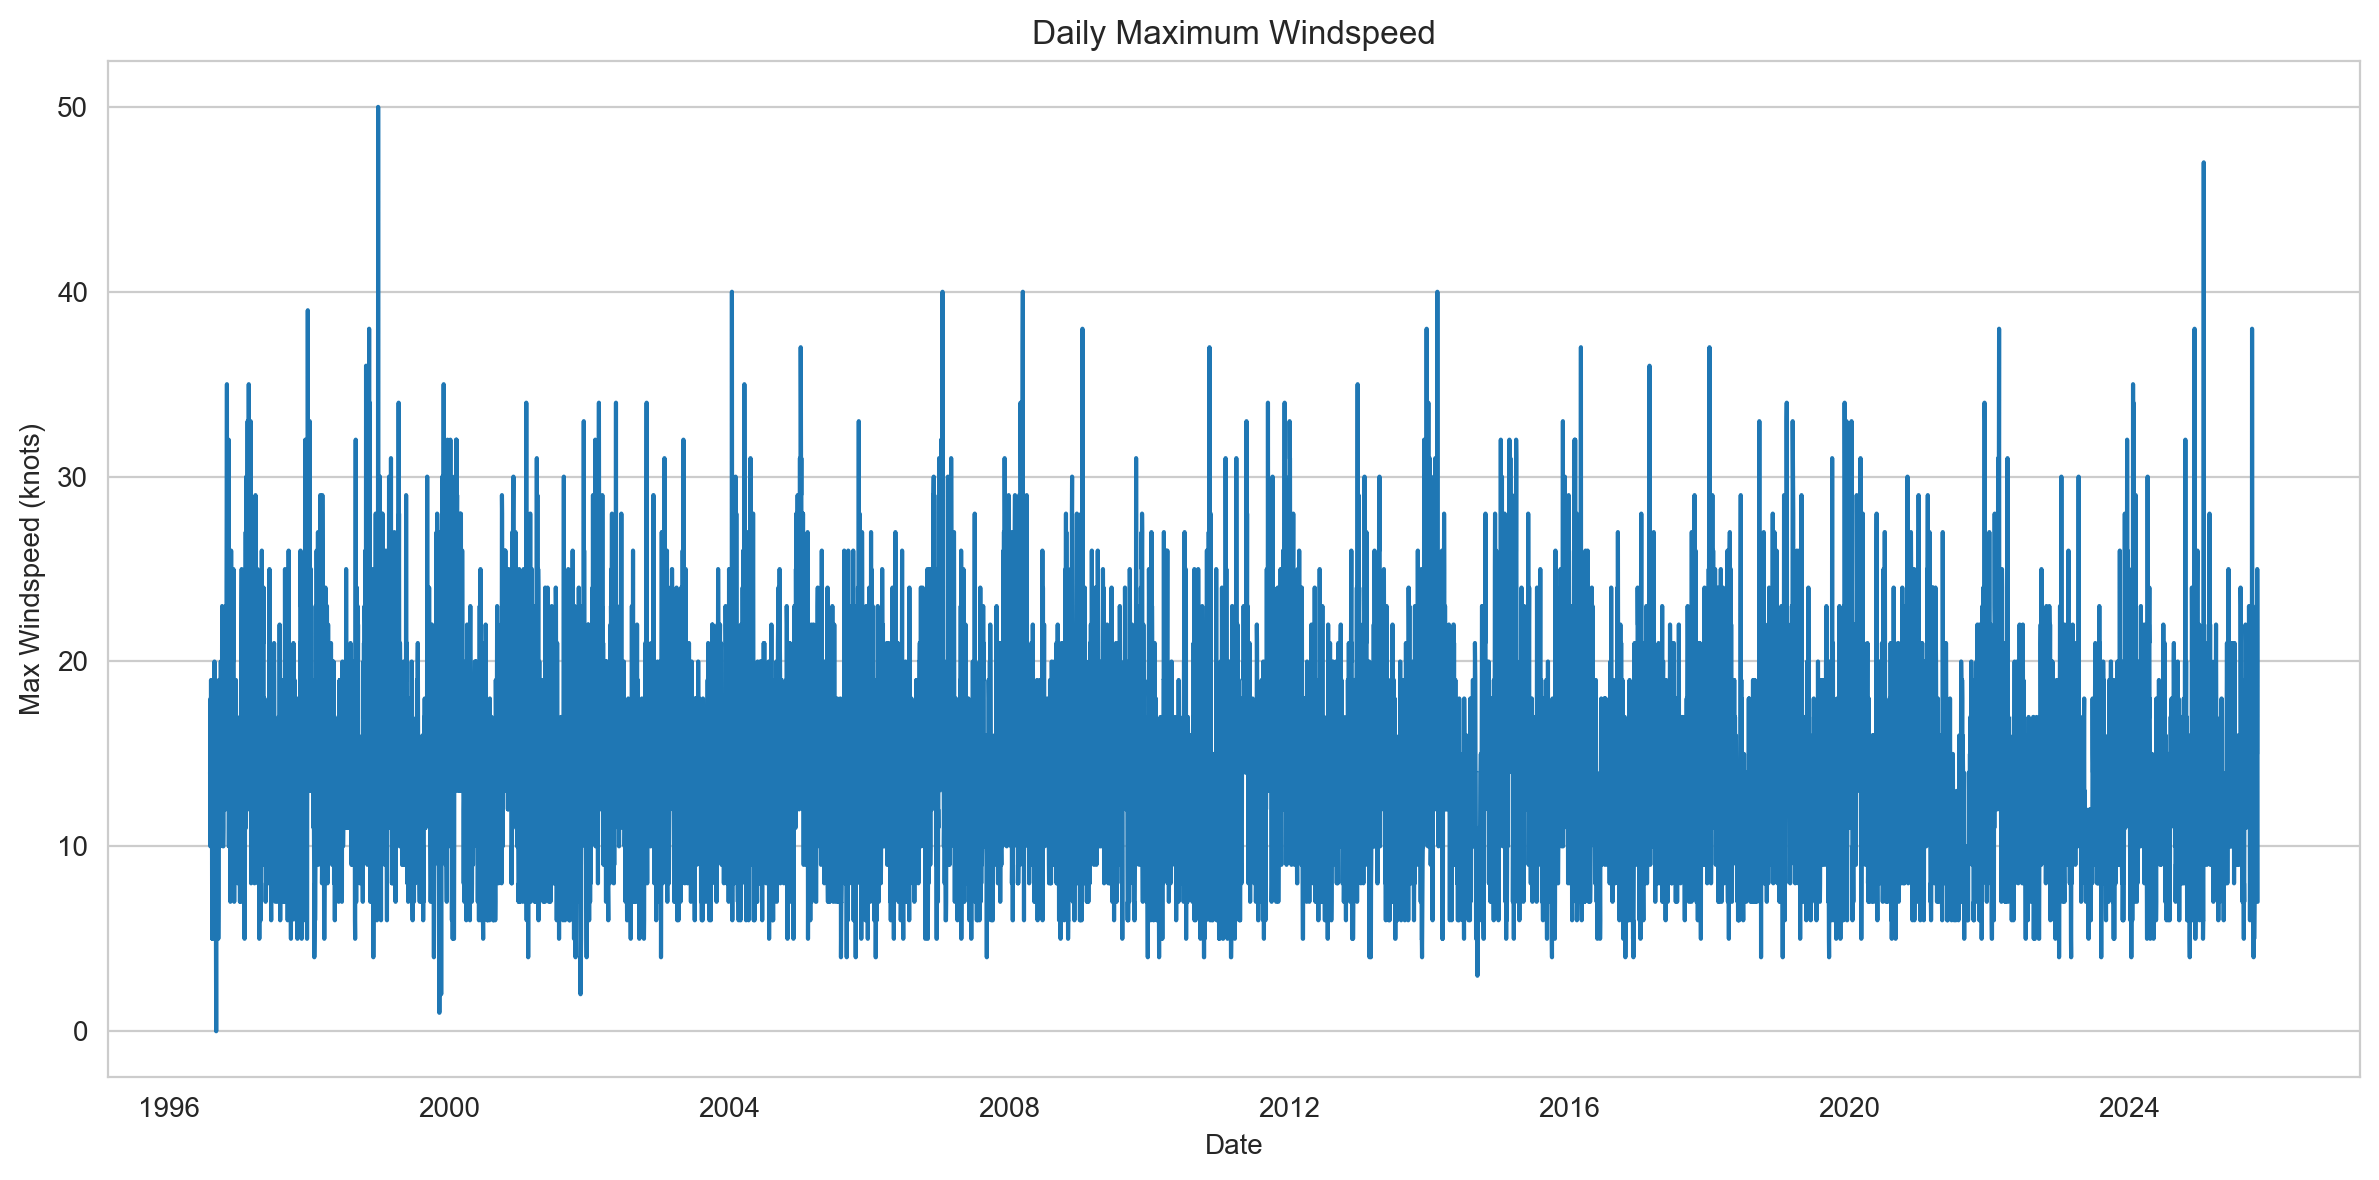

In [18]:
# We make our plot again, but this time, without the 0s
daily_max_wind = df.resample('D', on='date').agg({'wdsp': 'max'})

sns.set_style("whitegrid", {'axes.grid': False})
plt.figure(figsize=(12, 6), dpi=200)
plt.title("Daily Maximum Windspeed")
plt.xlabel("Date")
plt.ylabel("Max Windspeed (knots)")
plt.grid(axis='y')
sns.lineplot(x='date', y='wdsp', data=daily_max_wind)
plt.tight_layout()
plt.show()

Finally, for the monthly mean of the daily max windspeeds, we need to do a few calculations:

In [19]:
# Get the daily max windspeed. Same formula as we did before
daily_max_wind = df.resample('D', on='date').agg({'wdsp': 'max'})

# We resample the above to get the monthly mean.
monthly_mean_of_daily_max = daily_max_wind.resample('ME').mean()

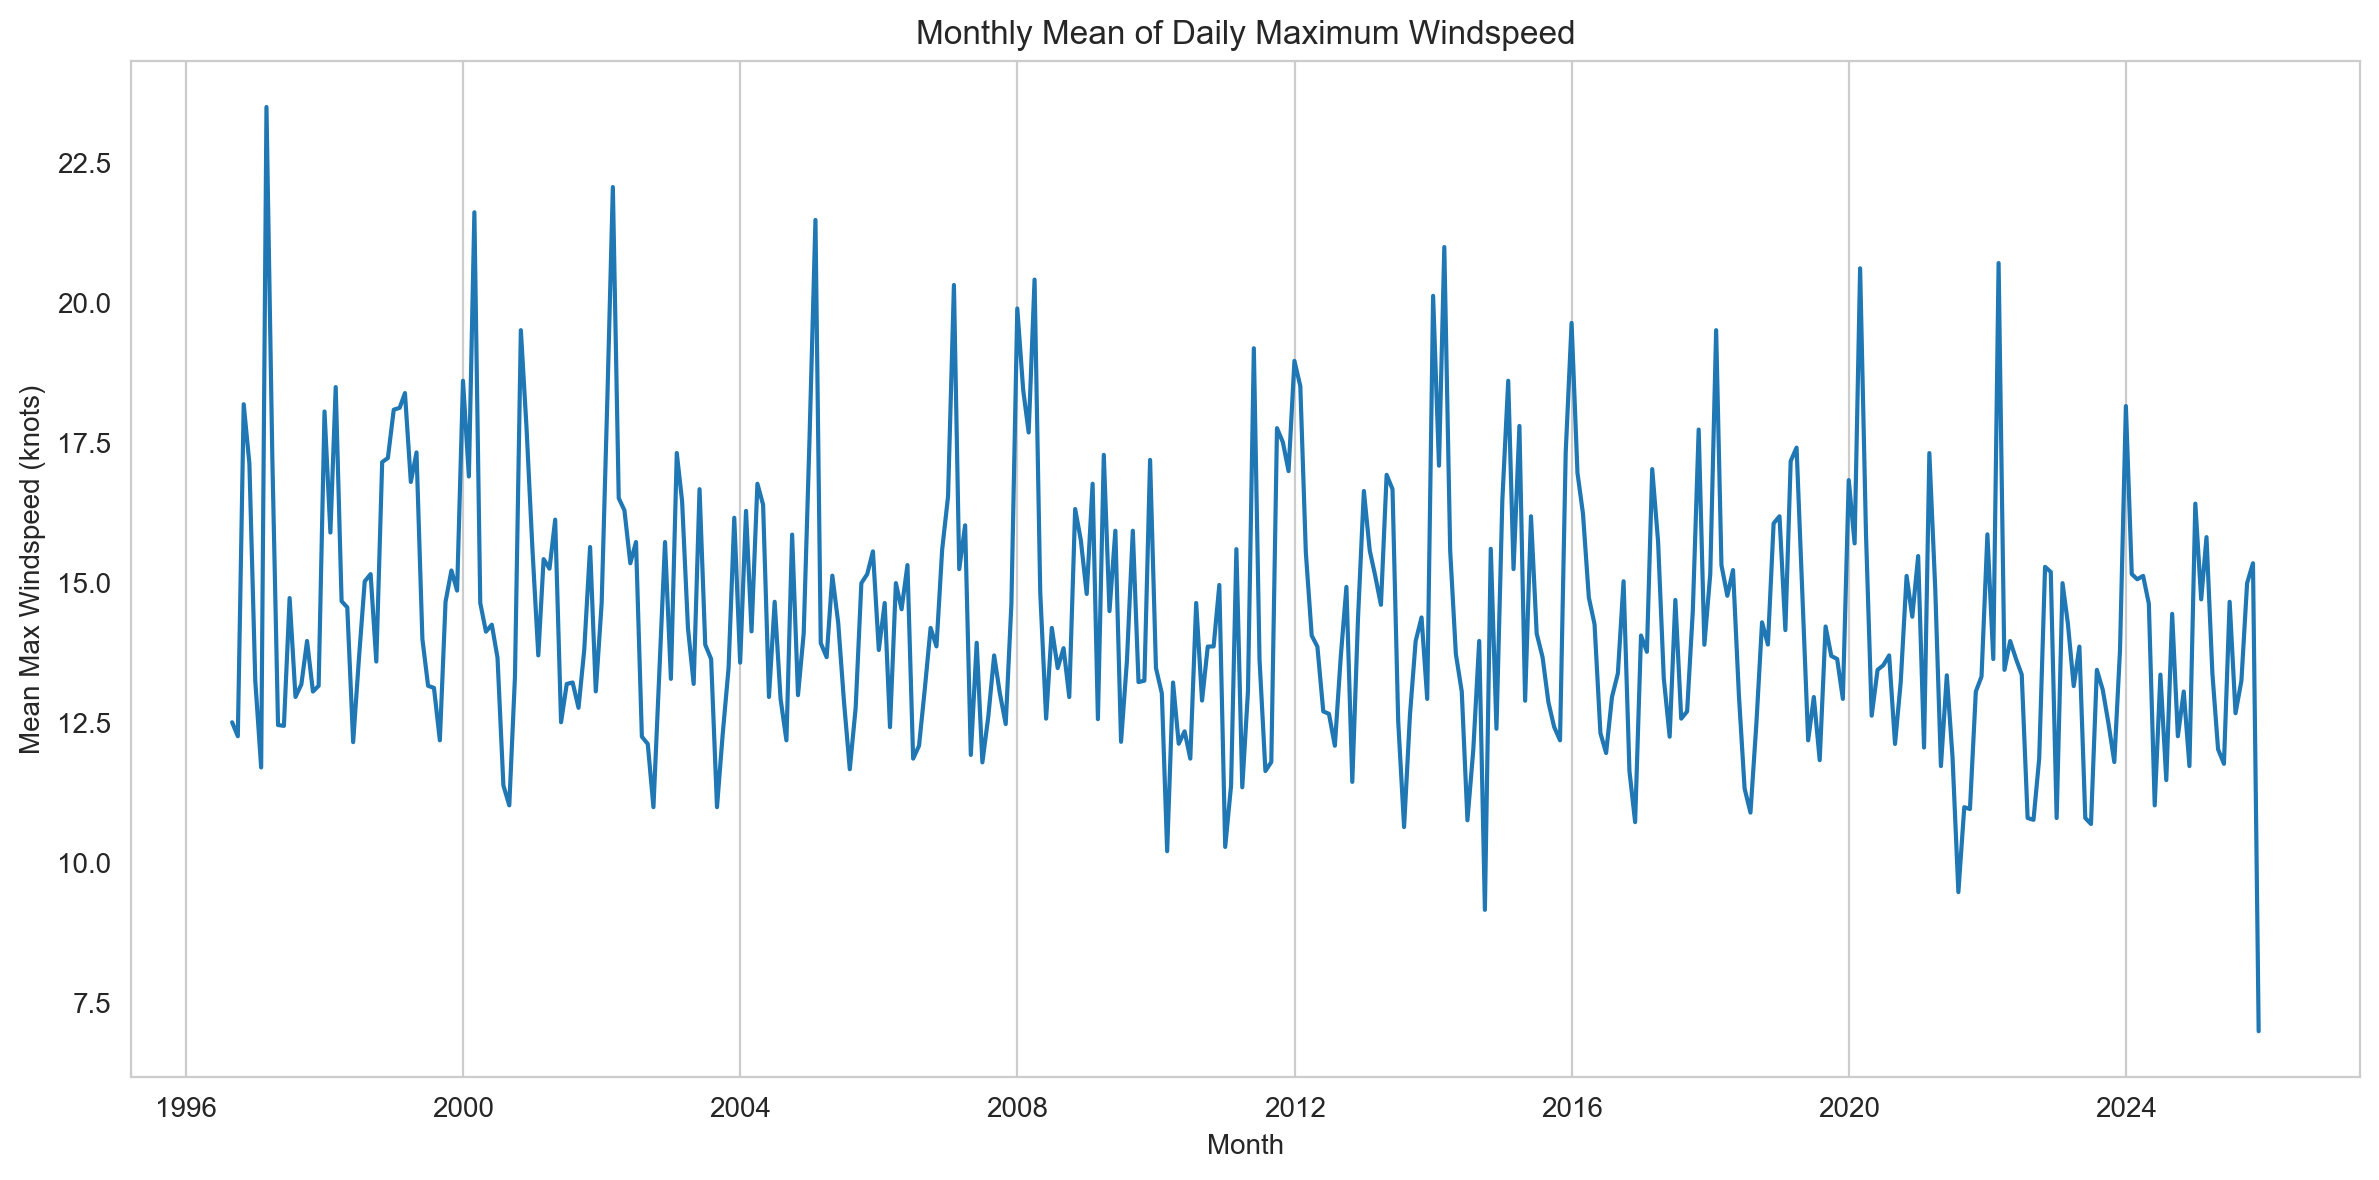

In [20]:
# Finally, we make our plot. Same logic as before.
plt.figure(figsize=(12, 6), dpi=200)
plt.title("Monthly Mean of Daily Maximum Windspeed")
plt.xlabel("Month")
plt.ylabel("Mean Max Windspeed (knots)")
plt.grid(axis='x')
sns.lineplot(x='date', y='wdsp', data=monthly_mean_of_daily_max)
plt.tight_layout()
plt.show()

We can see the sudden drop off there at the end. Again, I imagine this is just the systems powering down and it seems normal since windspeeds continously decrease naturally.

References:
>
Discussions 0 windspeed:

- https://www.quora.com/Can-wind-speed-be-zero 
- https://www.researchgate.net/post/Can-wind-speed-be-zero
>
- https://chatgpt.com/share/690bb017-874c-800b-8945-ea78fc8f5609 - On removing all initial 0s from the data.

## END